In [2]:
import pandas as pd

In [3]:
test = pd.read_csv('cs-test.csv')
train = pd.read_csv('cs-training.csv')
print "Test data shape: ", test.shape
print "Training data shape: ", train.shape

Test data shape:  (101503, 12)
Training data shape:  (150000, 12)


In [4]:
display(test.head())
print '- - ' * 20
display(train.head())

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
# cs_train 和 cs_test 中表头含义的说明
datatype = pd.read_excel('Data Dictionary.xls')
display(datatype)

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


## 数据类别的划分

1. 基本属性：age（年龄）
2. 财产状况：NumberOfOpenCreditLinesAndLoans（开放式贷款和信贷），NumberRealEstateLoansOrLines（不动产抵押贷款或房屋将会信贷额度）
3. 信用状况：NumberOfTimes90DaysLate（逾期>=90天），NumberOfTime60-89DaysPastDueNotWorse（逾期60-89天的次数），NumberOfTime30-59DaysPastDueNotWorse（逾期30-59天的次数）
4. 偿还能力：MonthlyIncome（月收入），DebtRatio（负债率）
5. 其他因素：NumberOfDependents（家属数量）

其中**SeriousDlqin2yrs**应该是我们需要进行预测的**y**值，其他数据属于基本变量。

In [6]:
import seaborn as sns
%matplotlib inline

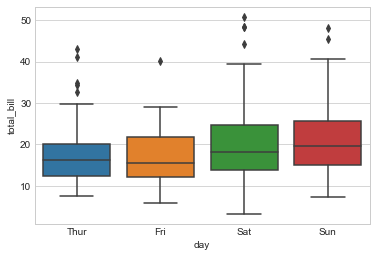

In [23]:
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["day"], y=tips['total_bill'])

In [22]:
display(tips.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. 缺失值的处理

首先观察一下Train数据集中各行中缺失值的比例

In [7]:
import numpy as np
# 去除序列号列
train = train.drop('Unnamed: 0', axis=1)

In [7]:
# 统计每列数据中NAN值的比例
for col in train.columns:
    nanCount = np.count_nonzero(np.isnan(train[col]))
    print "%s\tNAN: %s, ratio:%.2f%%" %(col, nanCount, nanCount/150000.0*100)

SeriousDlqin2yrs	NAN: 0, ratio:0.00%
RevolvingUtilizationOfUnsecuredLines	NAN: 0, ratio:0.00%
age	NAN: 0, ratio:0.00%
NumberOfTime30-59DaysPastDueNotWorse	NAN: 0, ratio:0.00%
DebtRatio	NAN: 0, ratio:0.00%
MonthlyIncome	NAN: 29731, ratio:19.82%
NumberOfOpenCreditLinesAndLoans	NAN: 0, ratio:0.00%
NumberOfTimes90DaysLate	NAN: 0, ratio:0.00%
NumberRealEstateLoansOrLines	NAN: 0, ratio:0.00%
NumberOfTime60-89DaysPastDueNotWorse	NAN: 0, ratio:0.00%
NumberOfDependents	NAN: 3924, ratio:2.62%


可以看到在**MonthlyIncome**和**NumberOfDependents**存在缺失，分别有29731和3924个，其中MonthlyIncome缺失比例比较大。缺失值的处理方法有基于聚类，基于回归，基于均值，去除等。因为这里所占的比例比较大，不能简单的去除。这里借助`fancyimpute`中的KNN方法，对缺失值进行补全。

In [21]:
from fancyimpute import KNN

# 没有必要对字符型数据进行过滤
#tmpNum = train.select_dtypes(include=[np.float])
#print tmpNum.shape, tmpNum.columns
newList = [KNN(k=5, verbose=False).complete(x) for x in np.array_split(train, 15)]


In [57]:
train_filled = np.concatenate(newList)

In [15]:
# 将缺失值实例的结果保存到文件中
#np.savetxt('train_filled.txt', train_filled, header=' '.join(train.columns.tolist()))
train_filled = np.loadtxt('train_filled.txt')

## 2. 变量分析

In [12]:
print train_filled.shape

(150000, 10)


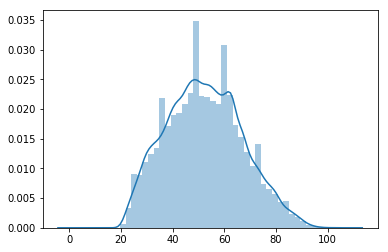

In [16]:
# 对年龄分布进行统计
sns.distplot(train_filled[:,2])

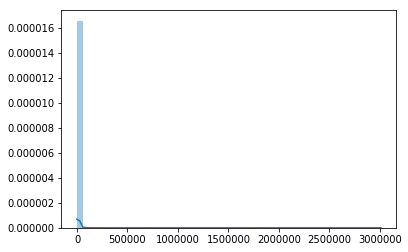

In [49]:
# 月收分布
sns.distplot(train_filled[:,5])

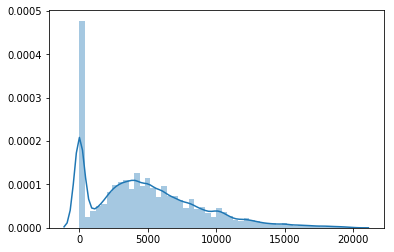

In [52]:
# 月收入在0-20000之间的分布
sns.distplot(train_filled[train_filled[:,4] < 20000,4])

In [56]:
from scipy.stats.stats import pearsonr   
for i in range(10):
    for j in range(i+1, 10):
        c = pearsonr(train_filled[:,i], train_filled[:,j])
        print "%s X %s" % (train.columns[i+1], train.columns[j+1])
        print c

RevolvingUtilizationOfUnsecuredLines X age
(-0.0058981829864683793, 0.022350542122401579)
RevolvingUtilizationOfUnsecuredLines X NumberOfTime30-59DaysPastDueNotWorse
(-0.0013135009632522091, 0.61095360810196953)
RevolvingUtilizationOfUnsecuredLines X DebtRatio
(0.0039612049761634655, 0.1249899698845367)
RevolvingUtilizationOfUnsecuredLines X MonthlyIncome
(0.0090486818779366776, 0.00045732478072391114)
RevolvingUtilizationOfUnsecuredLines X NumberOfOpenCreditLinesAndLoans
(-0.011280732694152529, 1.247530166826671e-05)
RevolvingUtilizationOfUnsecuredLines X NumberOfTimes90DaysLate
(-0.001061246378135609, 0.68106106251649889)
RevolvingUtilizationOfUnsecuredLines X NumberRealEstateLoansOrLines
(0.0062347134238417172, 0.015748283927398694)
RevolvingUtilizationOfUnsecuredLines X NumberOfTime60-89DaysPastDueNotWorse
(-0.0010478272157644858, 0.68487599013541467)
RevolvingUtilizationOfUnsecuredLines X NumberOfDependents
(0.0024136868101047103, 0.34988599149809962)
age X NumberOfTime30-59DaysPa

## 3. logistic线性回归

In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

因为SeriousDlqin2yrs列中0和1的分布差异很大，所以在拆分数据时，应该考虑两个值的比例的平衡。

In [17]:
from sklearn.model_selection import train_test_split
X = train_filled[:,1:]
y = train_filled[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8)

In [62]:
np.count_nonzero(y_train) / float(len(y_train))

0.06684166666666666

In [63]:
np.count_nonzero(y_test) / float(len(y_test))

0.06683333333333333

In [30]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
X_train.shape

(120000, 10)

In [26]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.GLM(y_train, X2)
est2 = est.fit()
print est2.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               120000
Model:                            GLM   Df Residuals:                   119989
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                 0.0588330713399
Method:                          IRLS   Log-Likelihood:                -284.06
Date:                Wed, 08 Nov 2017   Deviance:                       7059.3
Time:                        17:53:42   Pearson chi2:                 7.06e+03
No. Iterations:                     2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1412      0.003     48.966      0.000       0.136       0.147
x1         -2.601e-06   2.85e-06     -0.913      0.3

In [50]:
X2 = sm.add_constant(X_train)
est = sm.GLM(y_train, X2,family = sm.families.Binomial())
est2 = est.fit()
print est2.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               120000
Model:                            GLM   Df Residuals:                   119989
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -26972.
Date:                Wed, 08 Nov 2017   Deviance:                       53945.
Time:                        18:25:10   Pearson chi2:                 4.46e+05
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3528      0.047    -29.028      0.000      -1.444      -1.261
x1         -5.127e-05   8.17e-05     -0.627      0.5

In [49]:
family = sm.families.Binomial()

AttributeError: 'module' object has no attribute 'family'

In [25]:
X2 = sm.add_constant(np.delete(X_train, np.s_[0,3,7],1))
est = sm.GLM(y_train, X2)
est2 = est.fit()
print est2.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               120000
Model:                            GLM   Df Residuals:                   119992
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                  0.058834064653
Method:                          IRLS   Log-Likelihood:                -286.57
Date:                Wed, 08 Nov 2017   Deviance:                       7059.6
Time:                        17:53:29   Pearson chi2:                 7.06e+03
No. Iterations:                     2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1412      0.003     49.026      0.000       0.136       0.147
x1            -0.0016   4.93e-05    -32.017      0.0

## 4. 模型评估

In [39]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y_train, clf.decision_function(X_train))
print roc_score

0.696653963135


In [42]:
X_train2 = np.delete(X_train, np.s_[0,3,7],1)
clf2 = LogisticRegression()
clf2.fit(X_train2, y_train)
roc_score2 = roc_auc_score(y_train, clf2.decision_function(X_train2))
print roc_score2

0.696363284802


## 5. WOE转换

In [59]:
train.columns

Index([u'SeriousDlqin2yrs', u'RevolvingUtilizationOfUnsecuredLines', u'age',
       u'NumberOfTime30-59DaysPastDueNotWorse', u'DebtRatio', u'MonthlyIncome',
       u'NumberOfOpenCreditLinesAndLoans', u'NumberOfTimes90DaysLate',
       u'NumberRealEstateLoansOrLines',
       u'NumberOfTime60-89DaysPastDueNotWorse', u'NumberOfDependents'],
      dtype='object')

In [66]:
x2 = np.split(train_filled[:,2], range(30,80,5))

In [72]:
def cut(x, step):
    out = []
    for i, j in enumerate(step):
        if i == 0:
            tmp = np.where(np.logical_and(x>=0, x<j))
        elif i == len(step)-1:
            tmp = np.where(x>=j)
        else:
            tmp = np.where(np.logical_and(x>=step[i-1], x<step[i]))
        out.append(tmp)
    return out

In [75]:
np.where(np.logical_and(x))

[(array([0, 1]),), (array([6, 7]),)]